In [1]:
import numpy as np

#####################수정 불가#############################
x             = np.asarray([580, 700, 810, 840])
y_label_total = np.asarray([374, 385, 375, 401])

input_cnt  = 1
output_cnt = 1
###########################################################

RND_STD  = 1
RND_MEAN = 0

def main_execute(x,y, epoch_count, report ,lr = 0.001):
    model_init()
    sse_row, theta_0_row, theta_1_row = run_train(x,y, epoch_count, report ,lr)

    return sse_row, theta_0_row, theta_1_row

def model_init():
    global theta_0, theta_1
    theta_0 = np.random.normal(RND_MEAN, RND_STD, size = [output_cnt])
    theta_1 = np.random.normal(RND_MEAN, RND_STD, size = [input_cnt, output_cnt])

def run_train(x,y, epoch_count, report ,lr):
    print("Initial theta_0 : {}".format(theta_0))
    print("Initial theta_1 : {}".format(theta_1))
    sse_row = []
    theta_0_row, theta_1_row = [], []

    for epoch in range(epoch_count):
        y_hat = forward_neuralnet(x)
        sse   = forward_postproc(y_hat, y_label_total)
        sse_row.append(sse)
                
        back_propagation(y_hat, lr)
        
        theta_0_row.append(theta_0)
        theta_1_row.append(theta_1)

        if report > 0 and epoch % report == 0:
            print("Epoch - {}".format(epoch+1))
            print("SSE : {}".format(sse))

    print("==============================")
    print("Final SSE : {}".format(sse))

    return sse_row, theta_0_row, theta_1_row 

def forward_neuralnet(input_x):
    y_hat = theta_0 + theta_1 * input_x

    return y_hat

def forward_postproc(output, y):
    diff   = output - y
    square = np.square(diff)
    sse    = 1/2 * (np.sum(square))

    return sse

def back_propagation(y_hat, lr):
    global theta_0, theta_1
    theta_0 = theta_0 - lr * (np.sum(y_hat - y_label_total))
    theta_1 = theta_1 - lr * (np.sum(y_hat - y_label_total) * x)

sse_row, theta_0_row, theta_1_row = main_execute(x = x, 
                                                 y = y_label_total, 
                                                 epoch_count = 15, 
                                                 report = 3,
                                                 lr = 0.00000001)

Initial theta_0 : [0.68320752]
Initial theta_1 : [[-0.33246713]]
Epoch - 1
SSE : 788674.1173855013
Epoch - 4
SSE : 689556.5920210355
Epoch - 7
SSE : 603085.0490673486
Epoch - 10
SSE : 527666.612084228
Epoch - 13
SSE : 461907.7548248652
Final SSE : 422826.44871703285


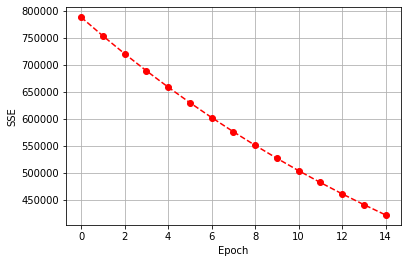

In [2]:
import matplotlib.pyplot as plt

plt.plot(sse_row, '--o', color = 'red')
plt.xlabel('Epoch')
plt.ylabel('SSE')
plt.grid()
plt.show()

In [3]:
epoch_count = 10 
report      = 4

for epoch in range(epoch_count):
    print(epoch % report == 0) 

True
False
False
False
True
False
False
False
True
False
